In [1]:
import matplotlib.pyplot as plt
import numpy as np

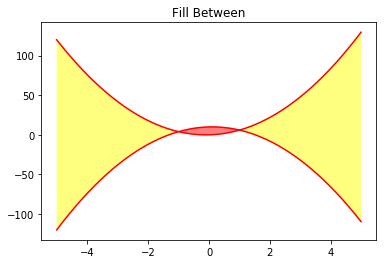

In [13]:
x = np.arange(-5, 5, 0.01)
y1 = -5*x*x + x + 10
y2 = 5*x*x + x

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='r')
ax.fill_between(x, y1, y2, where=y2 >y1, facecolor='yellow', alpha=0.5)
ax.fill_between(x, y1, y2, where=y2 <=y1, facecolor='red', alpha=0.5)
ax.set_title('Fill Between')

plt.show()

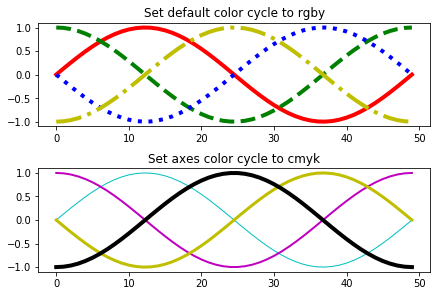

In [18]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler(color=['r', 'g', 'b', 'y']) +
                           cycler(linestyle=['-', '--', ':', '-.'])))
fig, (ax0, ax1) = plt.subplots(nrows=2, constrained_layout=True)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

# 2. Define prop cycle for single set of axes
#    For the most general use-case, you can provide a cycler to
#    `.set_prop_cycle`.
#    Here, we use the convenient shortcut that we can alternatively pass
#    one or more properties as keyword arguements. This creates and sets
#    a cycler iterating simultaneously over all properties.
ax1.set_prop_cycle(color=['c', 'm', 'y', 'k'], lw=[1, 2, 3, 4])
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

plt.show()

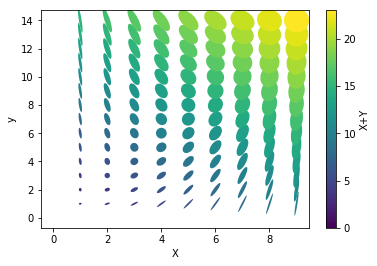

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import EllipseCollection

x = np.arange(10)
y = np.arange(15)
X, Y = np.meshgrid(x, y)

XY = np.column_stack((X.ravel(), Y.ravel()))

ww = X / 10.0
hh = Y / 15.0
aa = X * 9


fig, ax = plt.subplots()

ec = EllipseCollection(ww, hh, aa, units='x', offsets=XY,
                       transOffset=ax.transData)
ec.set_array((X + Y).ravel())
ax.add_collection(ec)
ax.autoscale_view()
ax.set_xlabel('X')
ax.set_ylabel('y')
cbar = plt.colorbar(ec)
cbar.set_label('X+Y')
plt.show()

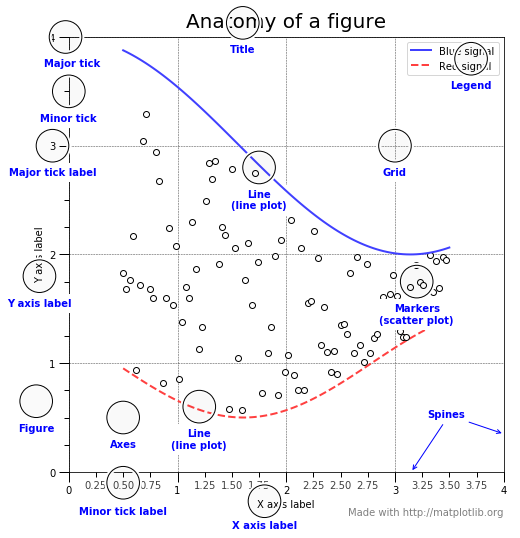

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

In [21]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

In [22]:
nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

In [23]:
patch = None


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

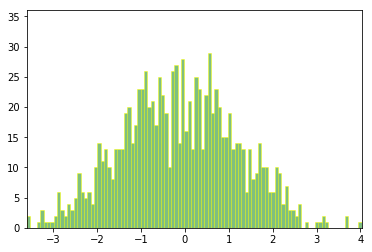

In [24]:
fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()

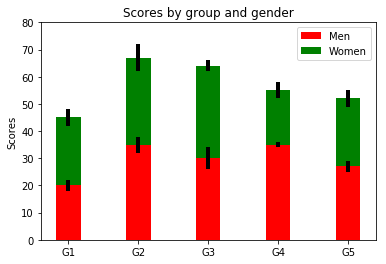

In [26]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [28]:
x

array([0.1       , 0.78702059, 1.47404118, 2.16106177, 2.84808236,
       3.53510295, 4.22212354, 4.90914413, 5.59616472, 6.28318531])

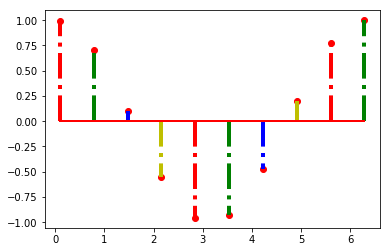

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# returns 10 evenly spaced samples from 0.1 to 2*PI
x = np.linspace(0.1, 2 * np.pi, 10)

markerline, stemlines, baseline = plt.stem(x, np.cos(x), '-.')

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

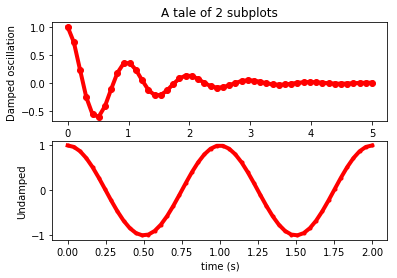

In [29]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

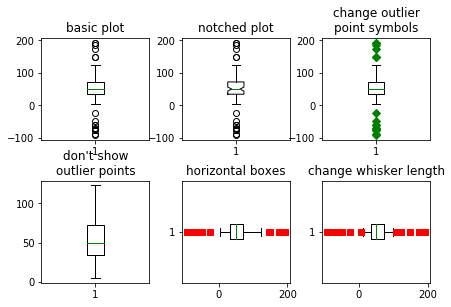

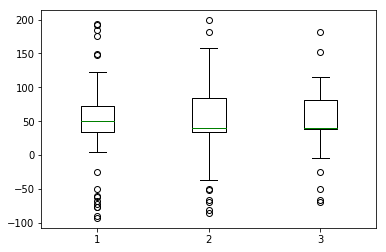

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change whisker length')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data.shape = (-1, 1)
d2.shape = (-1, 1)
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

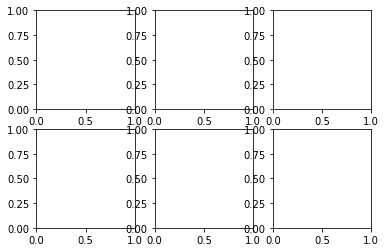

In [31]:
fig, axs = plt.subplots(2, 3)

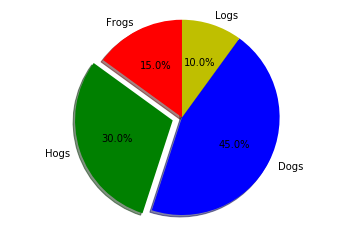

In [32]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

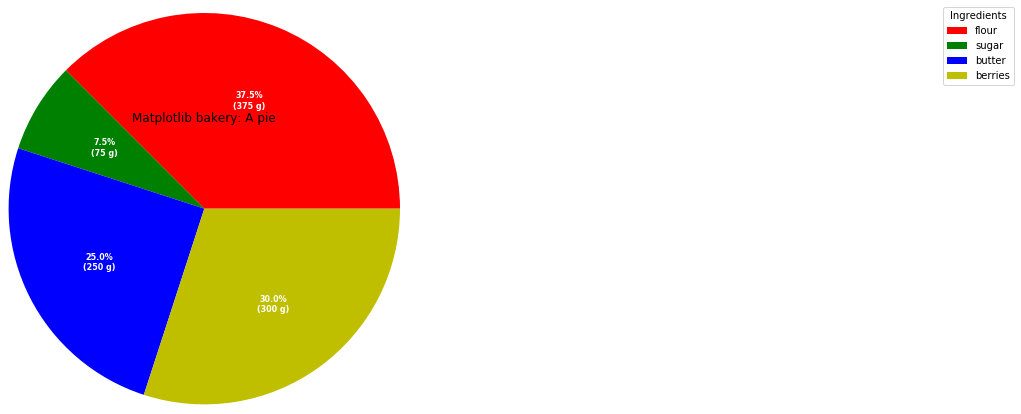

In [51]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, radius=3, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(5, 1, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie", )


plt.show()

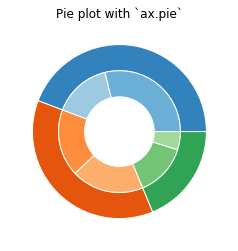

In [48]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

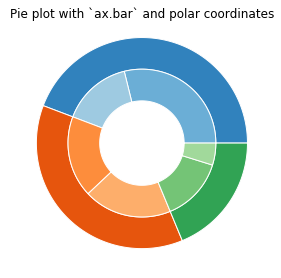

In [52]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
#normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
#obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()

[(-3, 5), (-1, 5)]

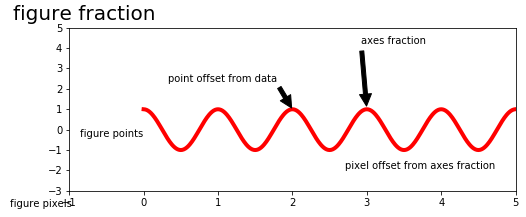

In [55]:
# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(8, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')
ax.annotate('figure points',
            xy=(80, 80), xycoords='figure points')
ax.annotate('figure fraction',
            xy=(.025, .975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

# The following examples show off how these arrows are drawn.

ax.annotate('point offset from data',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.annotate('axes fraction',
            xy=(3, 1), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# You may also use negative points or pixels to specify from (right, top).
# E.g., (-10, 10) is 10 points to the left of the right side of the axes and 10
# points above the bottom

ax.annotate('pixel offset from axes fraction',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax.set(xlim=(-1, 5), ylim=(-3, 5))

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Users\\admin\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\goog.npz'

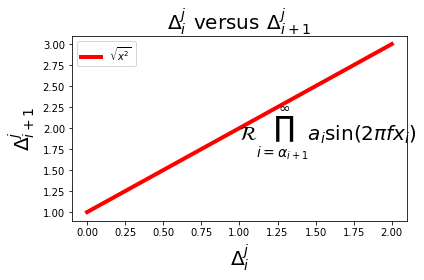

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot([1, 2, 3], 'r', label=r'$\sqrt{x^2}$')
ax.legend()

ax.set_xlabel(r'$\Delta_i^j$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}^j$', fontsize=20)
ax.set_title(r'$\Delta_i^j \hspace{0.4} \mathrm{versus} \hspace{0.4} '
             r'\Delta_{i+1}^j$', fontsize=20)

tex = r'$\mathcal{R}\prod_{i=\alpha_{i+1}}^\infty a_i\sin(2 \pi f x_i)$'
ax.text(1, 1.6, tex, fontsize=20, va='bottom')

fig.tight_layout()
plt.show()

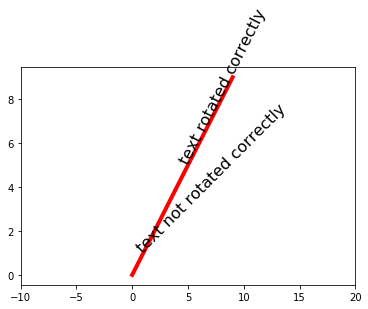

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Plot diagonal line (45 degrees)
h = plt.plot(np.arange(0, 10), np.arange(0, 10))

# set limits so that it no longer looks on screen to be 45 degrees
plt.xlim([-10, 20])

# Locations to plot text
l1 = np.array((1, 1))
l2 = np.array((5, 5))

# Rotate angle
angle = 45
trans_angle = plt.gca().transData.transform_angles(np.array((45,)),
                                                   l2.reshape((1, 2)))[0]

# Plot text
th1 = plt.text(l1[0], l1[1], 'text not rotated correctly', fontsize=16,
               rotation=angle, rotation_mode='anchor')
th2 = plt.text(l2[0], l2[1], 'text rotated correctly', fontsize=16,
               rotation=trans_angle, rotation_mode='anchor')

plt.show()

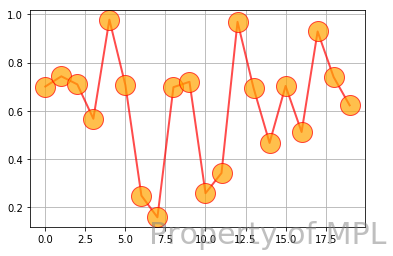

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ax.plot(np.random.rand(20), '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.grid()

fig.text(0.95, 0.05, 'Property of MPL',
         fontsize=30, color='gray',
         ha='right', va='bottom', alpha=0.5)

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'pcolorm'

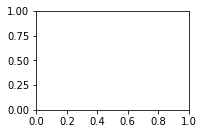

In [88]:
plt.subplot(2,2,1)
#axesm('lambert','maplatlimit',[ 26.5861,71.8699],'maplonlimit',[-34.748,60.8422])
ax=plt.gca()
ax.pcolorm(lat,lon,IU1)
set(gca,'box','off')
set(gca,'visible','off')
set(gcf,'resize','on')
colormap(C)

subplot(2,2,2)
axesm('lambert','maplatlimit',[ 26.5861, 71.8699],'maplonlimit',[-34.748, 60.8422])
pcolorm(lat,lon,IU2)
set(gca,'box','off')
set(gca,'visible','off')
set(gcf,'resize','on')
colormap(C)

subplot(2,2,3)
axesm('lambert','maplatlimit',[ 26.5861, 71.8699],'maplonlimit',[-34.748, 60.8422])
pcolorm(lat,lon,IU3)
set(gca,'box','off')
set(gca,'visible','off')
set(gcf,'resize','on')
colormap(C)
subplot(2,2,4)
axesm('lambert','maplatlimit',[ 26.5861, 71.8699],'maplonlimit',[-34.748, 60.8422])
pcolorm(lat,lon,IU4)
set(gca,'box','off')
set(gca,'visible','off')
set(gcf,'resize','on')
colormap(C)
hp4 = get(subplot(2,2,4),'Position')
h=colorbar;
set(h, 'Position', \
    [hp4(1)+hp4(3)+0.02, hp4(2),  0.01,  hp4(2)+hp4(3)*2.1],
    'YTickMode', 'manual', 'YTick',[1,2,3,4,5], 'YTickLabelMode', 
    'manual', 'YTickLabel', {'Hiper-arid', 'Arid', 'Semi-arid', 'Sub-humid', 'Humid'},
    'FontSize',12, 'FontWeight', 'bold')


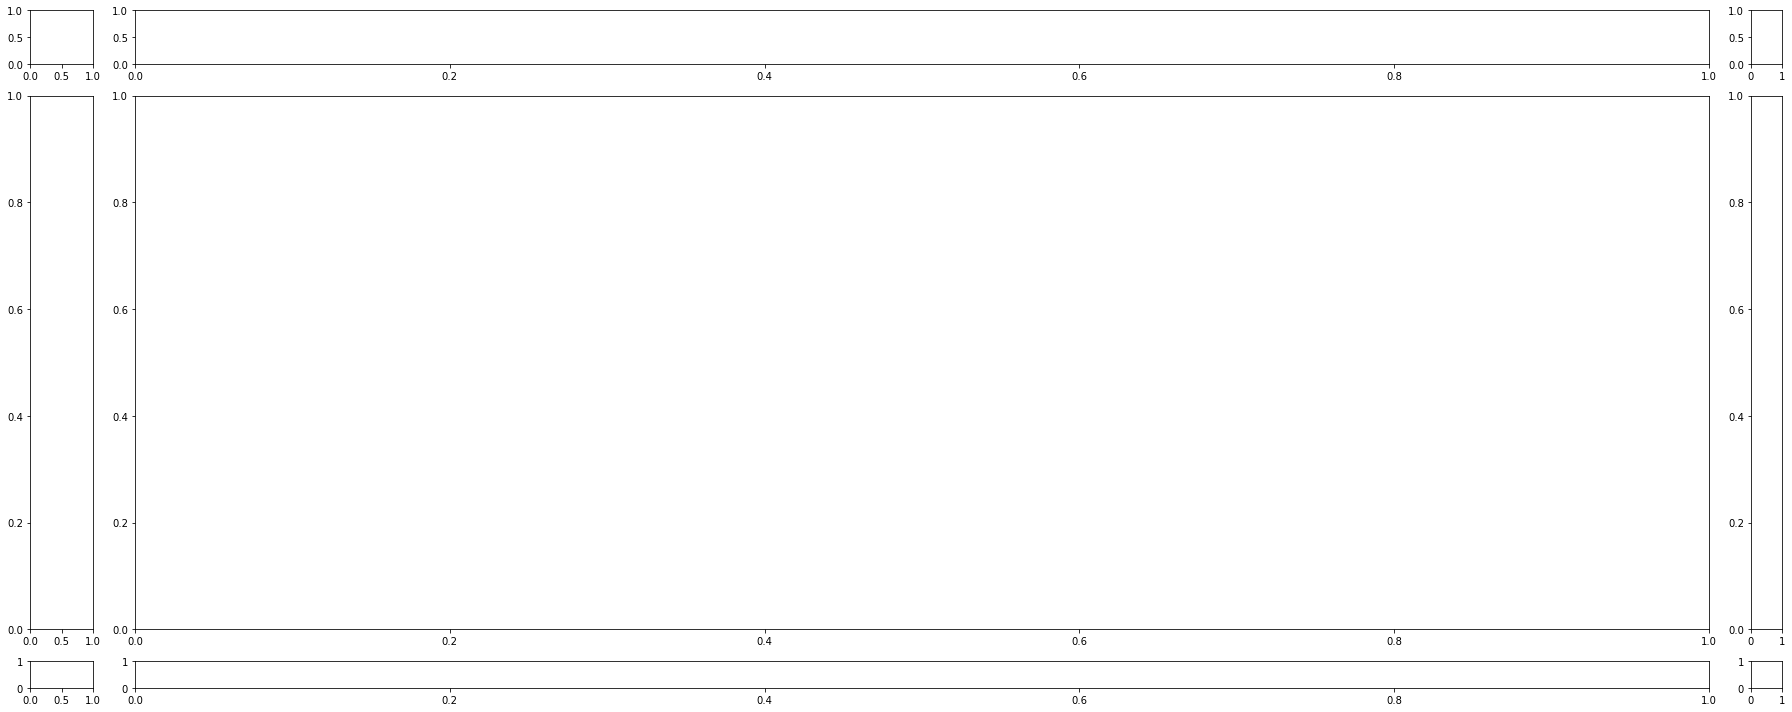

In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

YZ = np.random.normal(loc=0.0, scale=2.0, size=(10,25))
XB = np.random.normal(loc=0.0, scale=1.0, size=(25,1))
XA = np.random.normal(loc=0.0, scale=1.0, size=(10,1))

fig, ax = plt.subplots(
    3,3,
    figsize=( YZ.shape[1], YZ.shape[0], ),
    gridspec_kw={
        "width_ratios"  : [ 1, YZ.shape[1], 0.5 ],
        "height_ratios" : [ 1, YZ.shape[0], 0.5 ],
    }
)

with sns.axes_style("darkgrid"):
    hm = {}; hm[0],hm[1],hm[2] = {},{},{}
    hm[1][1] = sns.heatmap(
        data       = YZ,
        ax         = ax[1][1],
        square     = True,
        annot_kws  = {"size": 8},
        linewidths = 0,
        cbar       = True,
        cbar_ax    = ax[1][2],
    )
    hm[1][0] = sns.heatmap(
        data       = XA,
        ax         = ax[1][0],
        square     = True,
        annot_kws  = {"size": 8},
        linewidths = 2,
        linecolor  = "white",
        cbar       = False,
    )
    hm[0][1] = sns.heatmap(
        data       = XB.T,
        ax         = ax[0][1],
        square     = True,
        annot_kws  = {"size": 8},
        linewidths = 2,
        linecolor  = "white",
        cbar       = False,
    )
ax[1][1].get_shared_x_axes().join( ax[1][1], ax[0][1] )
ax[1][1].get_shared_y_axes().join( ax[1][1], ax[1][0] )
plt.tight_layout()
plt.show()

In [1]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt
import numpy as np

# Initialize the plot
fig = plt.figure()

In [12]:
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


In [36]:
# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax2.axhline(0.45)
ax1.axvline(0.65)
ax3.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'get_prop_cycle'

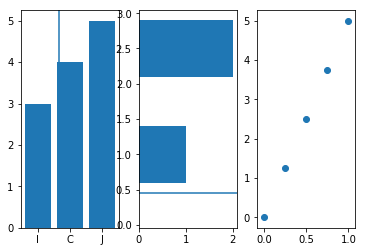

In [112]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt
import numpy as np

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot the data
ax.bar(["I","C","J"],[3,4,5])
ax.set_prop_cycle(color=['red', 'green', 'blue'])
ax2.barh([0.5,1,2.5],[0,1,2])
ax2.axhline(0.45)
ax.axvline(0.65)
ax3.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))

# Delete `ax3`
#fig.delaxes(ax3)
print (ax.get_prop_cycle())

# Show the plot
plt.show()

In [ ]:
for x in ax1.__dir__():
    print (x)

TypeError: If only one positional argument given, it must  be a Cycler instance.

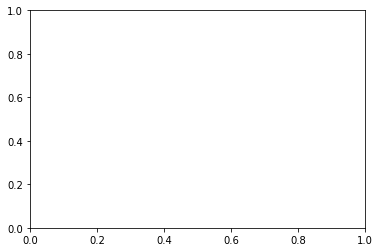

In [106]:
import matplotlib.pyplot as plt
import numpy as np

num_plots = 20

# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

# Plot several different functions...
x = np.arange(10)
labels = []
for i in range(1, num_plots + 1):
    plt.plot(x, i * x + 5 * i)
    labels.append(r'$y = %ix + %i$' % (i, 5*i))

# I'm basically just demonstrating several different legend options here...
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()

In [32]:
ax1._label="My Label"

In [33]:
ax1._label

'My Label'

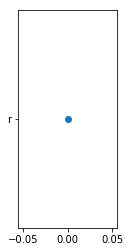

In [101]:
fig = plt.figure()
sp1 = fig.add_subplot(131)
o1 = sp1.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))
sp1.fill('r')

In [102]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [104]:
np.array(0, 5)

TypeError: data type not understood

In [100]:
#for p in o1.__dir__():
    #print(p)

In [95]:
i=o1.get_paths()
i[0]

Path(array([[ 0.        , -0.5       ],
       [ 0.13260155, -0.5       ],
       [ 0.25978994, -0.44731685],
       [ 0.35355339, -0.35355339],
       [ 0.44731685, -0.25978994],
       [ 0.5       , -0.13260155],
       [ 0.5       ,  0.        ],
       [ 0.5       ,  0.13260155],
       [ 0.44731685,  0.25978994],
       [ 0.35355339,  0.35355339],
       [ 0.25978994,  0.44731685],
       [ 0.13260155,  0.5       ],
       [ 0.        ,  0.5       ],
       [-0.13260155,  0.5       ],
       [-0.25978994,  0.44731685],
       [-0.35355339,  0.35355339],
       [-0.44731685,  0.25978994],
       [-0.5       ,  0.13260155],
       [-0.5       ,  0.        ],
       [-0.5       , -0.13260155],
       [-0.44731685, -0.25978994],
       [-0.35355339, -0.35355339],
       [-0.25978994, -0.44731685],
       [-0.13260155, -0.5       ],
       [ 0.        , -0.5       ],
       [ 0.        , -0.5       ]]), array([ 1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        

In [94]:
for p in list(i[0]):
    print (p + '\n')

TypeError: 'Path' object is not iterable

In [131]:
offsets

array([0.        , 1.57079633, 3.14159265, 4.71238898])

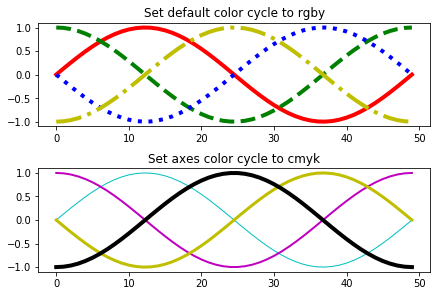

In [129]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler(color=['r', 'g', 'b', 'y']) +
                           cycler(linestyle=['-', '--', ':', '-.'])))

sp1, (ax0, ax1) = plt.subplots(nrows=2, constrained_layout=True)

ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

# 2. Define prop cycle for single set of axes
#    For the most general use-case, you can provide a cycler to
#    `.set_prop_cycle`.
#    Here, we use the convenient shortcut that we can alternatively pass
#    one or more properties as keyword arguements. This creates and sets
#    a cycler iterating simultaneously over all properties.

ax1.set_prop_cycle(color=['c', 'm', 'y', 'k'], lw=[1, 2, 3, 4])

ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

plt.show()

In [125]:
help(plt.clf)

Help on function clf in module matplotlib.pyplot:

clf()
    Clear the current figure.



In [1]:
def main():
   plt.figure()
   plt.plot([0,1],[0,1])
   plt.text(0.5,0.5,"string",weight="bold")

Text(150000, 7, 'small counties; most vote for McCain')

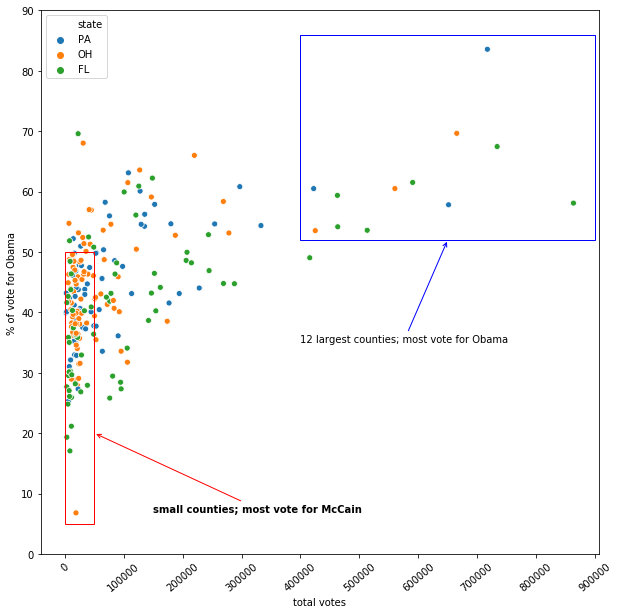

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Rectangle
import seaborn as sns

swing = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv')

plt.figure(figsize=(10,10))
sns.scatterplot(x='total_votes', y='dem_share', data=swing, hue='state')
plt.xlabel('total votes')
plt.ylabel('% of vote for Obama')
plt.xticks([x for x in range(0, 1000000, 100000)], rotation=40)
plt.yticks([x for x in range(0, 100, 10)])

# Create a Rectangle patch
plt.gca().add_patch(Rectangle((400000, 52), 500000, 34, linewidth=1, edgecolor='b', facecolor='none'))

plt.gca().add_patch(Rectangle((0, 5), 50000, 45, linewidth=1, edgecolor='r', facecolor='none'))

plt.annotate('12 largest counties; most vote for Obama', xy=(650000, 52),
             xytext=(400000, 35), fontsize=10, arrowprops=dict(arrowstyle="->", color='b'))

plt.annotate('small counties; most vote for McCain', xy=(50000, 20), weight='bold',
             xytext=(150000, 7), fontsize=10, arrowprops=dict(arrowstyle="->", color='r'))

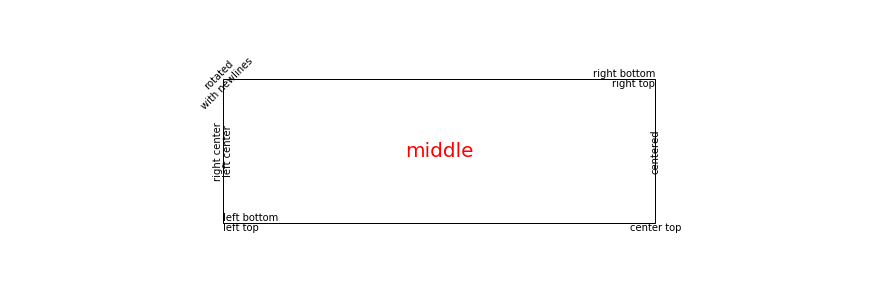

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])

# axes coordinates: (0, 0) is bottom left and (1, 1) is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(0.5*(left+right), 0.5*(bottom+top), 'middle',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

ax.text(right, 0.5*(bottom+top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes)

ax.set_axis_off()
plt.show()

rcParam	usage
'font.family'	List of either names of font or {'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}.
'font.style'	The default style, ex 'normal', 'italic'.
'font.variant'	Default variant, ex 'normal', 'small-caps' (untested)
'font.stretch'	Default stretch, ex 'normal', 'condensed' (incomplete)
'font.weight'	Default weight. Either string or integer
'font.size'	Default font size in points. Relative font sizes ('large', 'x-small') are computed against this size.

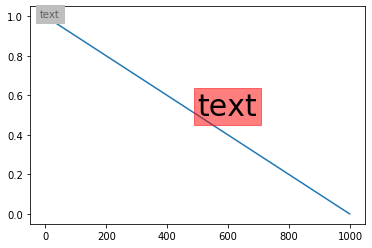

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
ax = plt.subplot(111)
plt.plot(np.linspace(1,0,1000))
t = plt.text(0.03,.95,'text',transform=ax.transAxes,backgroundcolor='0.75',alpha=.5)


t.figure.patch.set_alpha(.5)

t = plt.text(0.5, 0.5, 'text', transform=ax.transAxes, fontsize=30)
t.set_bbox(dict(facecolor='red', alpha=0.5, edgecolor='red'))

plt.show()

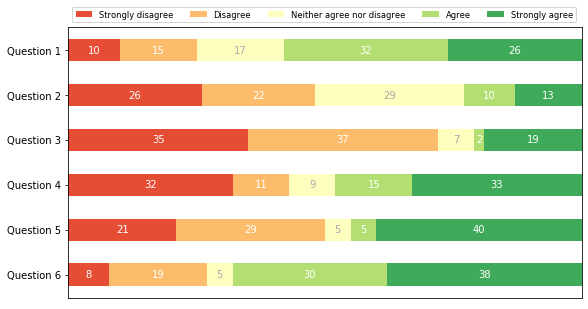

In [18]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
            ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

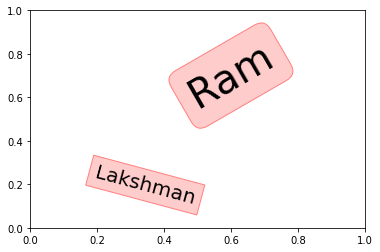

In [29]:
import matplotlib.pyplot as plt

plt.text(0.6, 0.7, "Ram", size=40, rotation=30.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(0.5, 0.3, "Lakshman", size=20, rotation=-15.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.show()

In [ ]:
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html

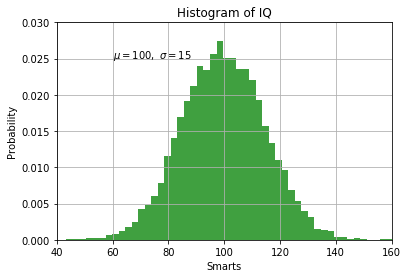

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

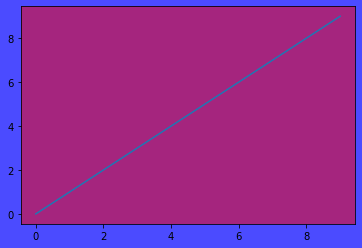

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.7)

ax = fig.add_subplot(111)

ax.plot(range(10))

ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.5)

# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
fig.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

In [42]:
import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
        model = keras.Sequential([
          keras.layers.Dense(
              16, activation='relu',
              input_shape=(train_features.shape[-1],)),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
      ])

    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

make_model(METRICS)

UnboundLocalError: local variable 'model' referenced before assignment

In [43]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
 
# generate and prepare the dataset
def get_data():
	# generate dataset
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	# split into train and test
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy
 
# define and fit the model
def get_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model
 
# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)
 
 
# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

Accuracy: 0.852000
Precision: 0.853175
Recall: 0.853175
F1 score: 0.853175
Cohens kappa: 0.703981
ROC AUC: 0.925211
[[211  37]
 [ 37 215]]
